In [4]:
!pip install umap-learn

In [5]:
# Paso 1: Cargar librerías
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
import seaborn as sns

# Paso 2: Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Paso 3: Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

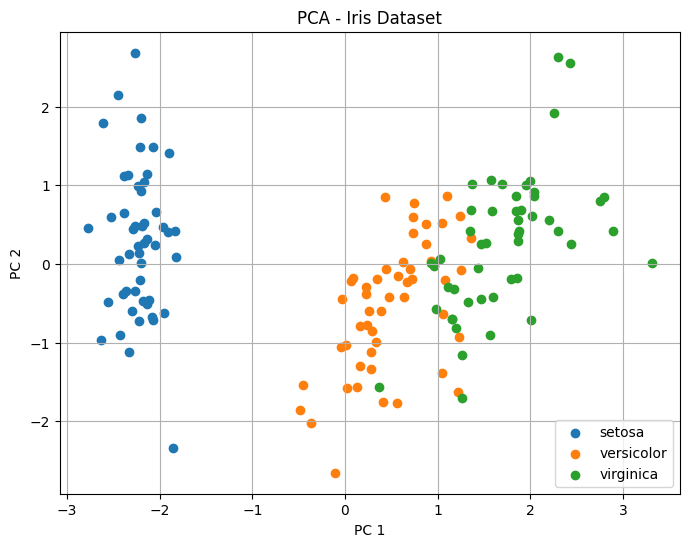

In [6]:
# Paso 4: Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Paso 5: Visualizar resultados
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


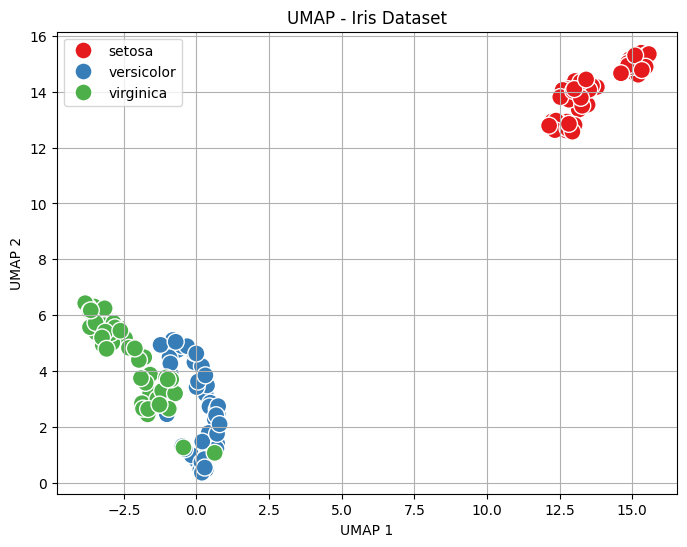

In [13]:
# Paso 6: UMAP requiere datos normalizados
X_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(X_scaled)

# Paso 7: Visualizar resultados
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=[target_names[i] for i in y], palette='Set1', s=150)
plt.title('UMAP - Iris Dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

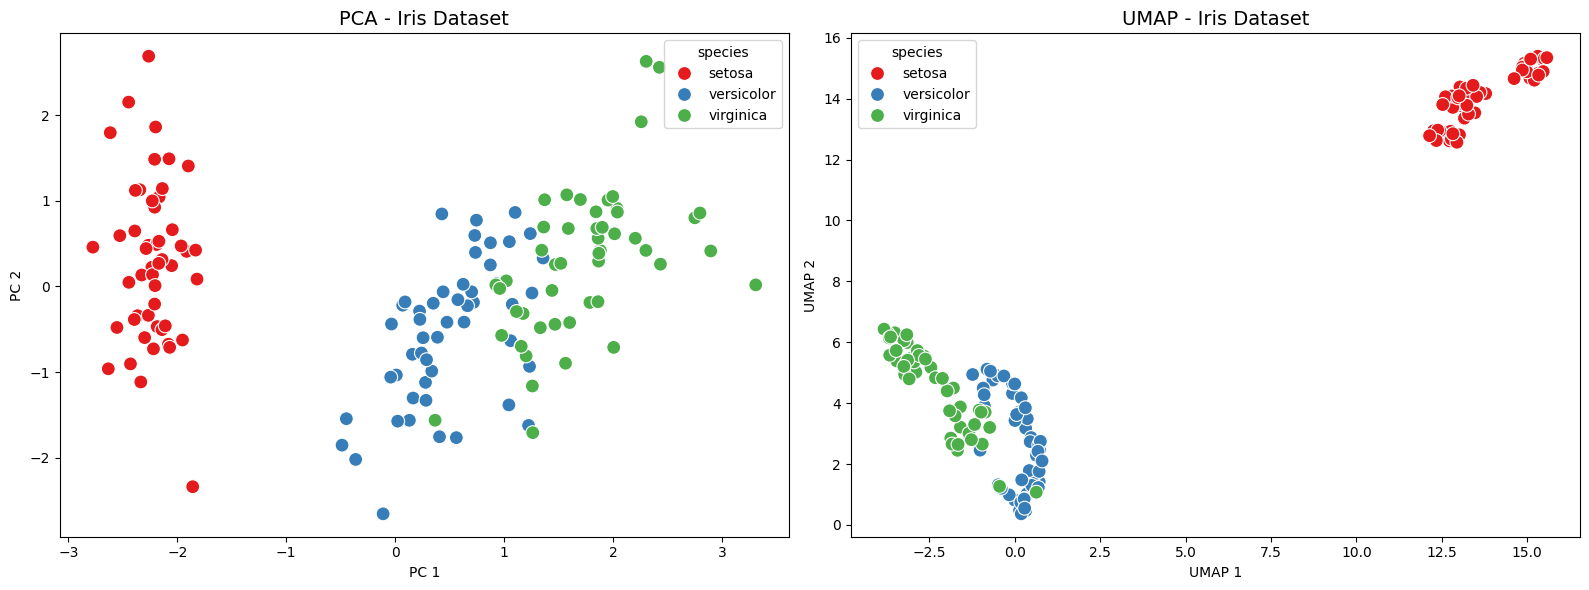

In [14]:
# Comparación de ambos gráficos
# Crear DataFrames para visualización
df_pca = pd.DataFrame(X_pca, columns=["Dim1", "Dim2"])
df_pca["species"] = [target_names[i] for i in y]

df_umap = pd.DataFrame(X_umap, columns=["Dim1", "Dim2"])
df_umap["species"] = [target_names[i] for i in y]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df_pca, x="Dim1", y="Dim2", hue="species", palette="Set1", s=100, ax=axes[0])
axes[0].set_title("PCA - Iris Dataset", fontsize=14)
axes[0].set_xlabel("PC 1")
axes[0].set_ylabel("PC 2")

sns.scatterplot(data=df_umap, x="Dim1", y="Dim2", hue="species", palette="Set1", s=100, ax=axes[1])
axes[1].set_title("UMAP - Iris Dataset", fontsize=14)
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.show()